<a href="https://colab.research.google.com/github/Niluferkk/DSML-PROJECT/blob/main/Project_preprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from  sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.impute import SimpleImputer
import joblib

**Load Dataset**

In [3]:
data=pd.read_csv('online_sales_dataset.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


**Data Exploration**

In [4]:
data.shape

(49782, 17)

In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [7]:
data.dtypes

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
Discount,float64
PaymentMethod,object


In [8]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


In [9]:
#finding missing values
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4978
Country,0
Discount,0
PaymentMethod,0


In [10]:
missing_data_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_data_percentage)

InvoiceNo            0.000000
StockCode            0.000000
Description          0.000000
Quantity             0.000000
InvoiceDate          0.000000
UnitPrice            0.000000
CustomerID           9.999598
Country              0.000000
Discount             0.000000
PaymentMethod        0.000000
ShippingCost         4.999799
Category             0.000000
SalesChannel         0.000000
ReturnStatus         0.000000
ShipmentProvider     0.000000
WarehouseLocation    7.000522
OrderPriority        0.000000
dtype: float64


In [11]:
data['CustomerID'] = data['CustomerID'].fillna(data['CustomerID'].median())

In [12]:
data['ShippingCost'] = data['ShippingCost'].fillna(data['ShippingCost'].median())

In [13]:
data['WarehouseLocation'] = data['WarehouseLocation'].fillna('Unknown')


In [14]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Discount,0
PaymentMethod,0


In [16]:
#DROP UNWANTED COLUMNS

data.drop(columns=['InvoiceNo','StockCode','WarehouseLocation'],axis=1, inplace=True)


In [18]:
#After removing unwanted columns
data.columns



Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'Discount', 'PaymentMethod', 'ShippingCost', 'Category',
       'SalesChannel', 'ReturnStatus', 'ShipmentProvider', 'OrderPriority'],
      dtype='object')

In [19]:
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,OrderPriority
0,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,Medium
1,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Medium
2,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,High
3,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Low
4,USB Cable,-30,2020-01-01 04:00,-68.11,55165.0,United Kingdom,1.501433,Bank Transfer,17.50,Electronics,In-store,Not Returned,FedEx,Medium


In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
#negetive values
print(data[['Quantity', 'UnitPrice']].min())


Quantity    -50.00
UnitPrice   -99.98
dtype: float64


In [23]:
#Rows with negative values
print((data['UnitPrice'] < 0).sum())


1493


In [ ]:
print((data['Quantity'] < 0).sum())

2489


In [24]:
#converting negetive to absolute values
data['Quantity'] = data['Quantity'].apply(lambda x: abs(x))


In [25]:
data['UnitPrice'] = data['UnitPrice'].apply(lambda x: abs(x))

In [26]:
#after converting
print((data['UnitPrice'] < 0).sum())

0


In [27]:
print((data['Quantity'] < 0).sum())

0


In [28]:
#Calculating Total Price
data['TotalPrice'] = data['Quantity'] * data['UnitPrice'] * (1 - data['Discount'])
data.TotalPrice

,TotalPrice
0,34.439400
1,601.425000
2,927.153500
3,923.227200
4,-1024.578137
...,...
49777,1418.400000
49778,278.878600
49779,2932.600000
49780,1312.876800


In [29]:
data.columns

Index(['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'Discount', 'PaymentMethod', 'ShippingCost', 'Category',
       'SalesChannel', 'ReturnStatus', 'ShipmentProvider', 'OrderPriority',
       'TotalPrice'],
      dtype='object')

In [30]:
# Convert invoicedate to datetime in pandas

date_time=data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(date_time)

0       2020-01-01 00:00:00
1       2020-01-01 01:00:00
2       2020-01-01 02:00:00
3       2020-01-01 03:00:00
4       2020-01-01 04:00:00
                ...        
49777   2025-09-05 01:00:00
49778   2025-09-05 02:00:00
49779   2025-09-05 03:00:00
49780   2025-09-05 04:00:00
49781   2025-09-05 05:00:00
Name: InvoiceDate, Length: 49782, dtype: datetime64[ns]


In [31]:
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceMonth'] = data['InvoiceDate'].dt.month
data['InvoiceDay'] = data['InvoiceDate'].dt.day
data['InvoiceWeekday'] = data['InvoiceDate'].dt.day_name()
data['InvoiceHour'] = data['InvoiceDate'].dt.hour


In [32]:
data[[ 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceWeekday', 'InvoiceHour']].sample(5)

,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday,InvoiceHour
35430,2024,1,16,Tuesday,6
19502,2022,3,23,Wednesday,14
34376,2023,12,3,Sunday,8
29972,2023,6,2,Friday,20
20206,2022,4,21,Thursday,22


In [33]:
#dropped invoicedate column
data.drop('InvoiceDate', axis=1, inplace=True)

**Encoding**

In [ ]:
data.select_dtypes(include='object').columns

Index(['Description', 'InvoiceDate', 'Country', 'PaymentMethod', 'Category',
       'SalesChannel', 'ReturnStatus', 'ShipmentProvider', 'OrderPriority'],
      dtype='object')

In [36]:
#Label enncoding for columns:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['OrderPriority'] = le.fit_transform(data['OrderPriority'])
data['SalesChannel'] = le.fit_transform(data['SalesChannel'])
data['PaymentMethod'] = le.fit_transform(data['PaymentMethod'])
data['ReturnStatus'] = le.fit_transform(data['ReturnStatus'])
data['Description'] = le.fit_transform(data['Description'])
data['Country'] = le.fit_transform(data['Country'])
data['Category'] = le.fit_transform(data['Category'])
data['ShipmentProvider'] = le.fit_transform(data['ShipmentProvider'])
data['InvoiceWeekday'] = le.fit_transform(data['InvoiceWeekday'])

'Description','Country', 'Category', 'ShipmentProvider', 'InvoiceWeekday'


('Description', 'Country', 'Category', 'ShipmentProvider', 'InvoiceWeekday')

In [38]:
data.dtypes

,0
Description,int64
Quantity,int64
UnitPrice,float64
CustomerID,float64
Country,int64
Discount,float64
PaymentMethod,int64
ShippingCost,float64
Category,int64
SalesChannel,int64


In [39]:
data

,Description,Quantity,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,OrderPriority,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday,InvoiceHour
0,9,38,1.71,37039.0,0,0.470000,0,10.79,1,0,0,3,2,34.439400,2020,1,1,6,0
1,9,18,41.25,19144.0,8,0.190000,2,9.51,2,1,0,3,2,601.425000,2020,1,1,6,1
2,3,49,29.11,50472.0,3,0.350000,0,23.03,2,1,1,3,0,927.153500,2020,1,1,6,2
3,2,14,76.68,96586.0,5,0.140000,2,11.08,0,1,0,2,1,923.227200,2020,1,1,6,3
4,7,30,68.11,55165.0,10,1.501433,0,17.50,2,0,0,1,2,-1024.578137,2020,1,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,1,25,70.92,51445.0,8,0.200000,1,8.96,2,1,1,3,2,1418.400000,2025,9,5,0,1
49778,7,7,51.74,28879.0,11,0.230000,0,23.55,2,1,0,1,1,278.878600,2025,9,5,0,2
49779,5,43,85.25,21825.0,7,0.200000,0,16.26,3,0,0,1,0,2932.600000,2025,9,5,0,3
49780,4,48,39.64,43199.0,10,0.310000,2,28.56,1,1,0,2,2,1312.876800,2025,9,5,0,4


**Handling** **Outliers**

In [41]:
#detecting outliers in all numerical columns

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"\n📊 Column: {col}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Number of Outliers: {outliers.shape[0]}")



📊 Column: Description
  Lower Bound: -7.00
  Upper Bound: 17.00
  Number of Outliers: 0

📊 Column: Quantity
  Lower Bound: -23.00
  Upper Bound: 73.00
  Number of Outliers: 0

📊 Column: UnitPrice
  Lower Bound: -48.40
  Upper Bound: 149.63
  Number of Outliers: 0

📊 Column: CustomerID
  Lower Bound: -24283.62
  Upper Bound: 134241.38
  Number of Outliers: 0

📊 Column: Country
  Lower Bound: -8.50
  Upper Bound: 19.50
  Number of Outliers: 0

📊 Column: Discount
  Lower Bound: -0.24
  Upper Bound: 0.76
  Number of Outliers: 996

📊 Column: PaymentMethod
  Lower Bound: -3.00
  Upper Bound: 5.00
  Number of Outliers: 0

📊 Column: ShippingCost
  Lower Bound: -6.27
  Upper Bound: 41.22
  Number of Outliers: 0

📊 Column: Category
  Lower Bound: -2.00
  Upper Bound: 6.00
  Number of Outliers: 0

📊 Column: SalesChannel
  Lower Bound: -1.50
  Upper Bound: 2.50
  Number of Outliers: 0

📊 Column: ReturnStatus
  Lower Bound: 0.00
  Upper Bound: 0.00
  Number of Outliers: 4894

📊 Column: ShipmentPro

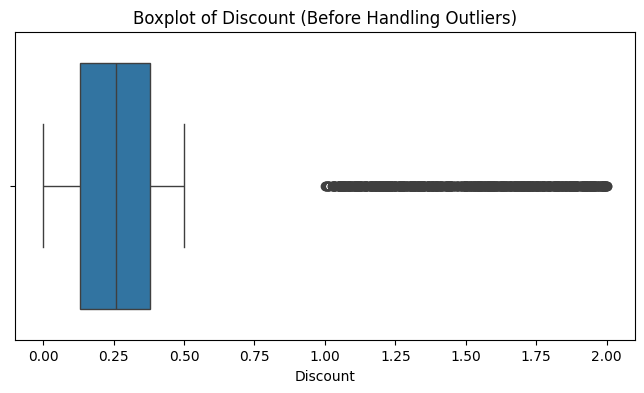

In [43]:
#Check Outliers using Boxplot (for Discount)

# Boxplot before handling outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Discount'])
plt.title('Boxplot of Discount (Before Handling Outliers)')
plt.show()


In [44]:
#Handling Outliers in Discount
Q1 = data['Discount'].quantile(0.25)
Q3 = data['Discount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data['Discount'] = np.where(data['Discount'] < lower_bound, lower_bound,
                          np.where(data['Discount'] > upper_bound, upper_bound, data['Discount']))

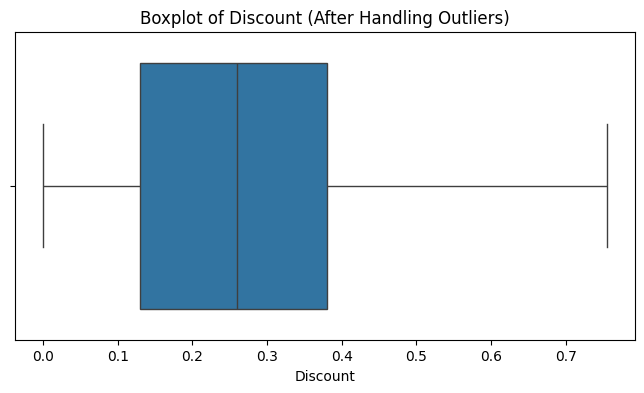

In [45]:

#After handling outliers

plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Discount'])
plt.title('Boxplot of Discount (After Handling Outliers)')
plt.show()

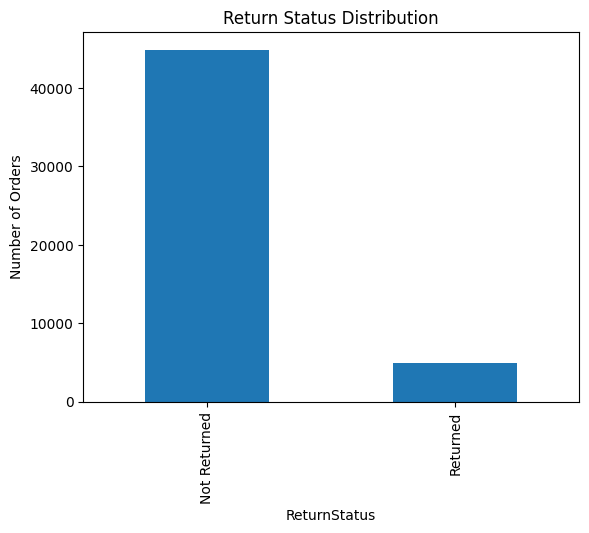

In [ ]:
#Visualizations -BAR CHART
data['ReturnStatus'].value_counts().plot(kind='bar', title='Return Status Distribution')
plt.ylabel('Number of Orders')
plt.show()


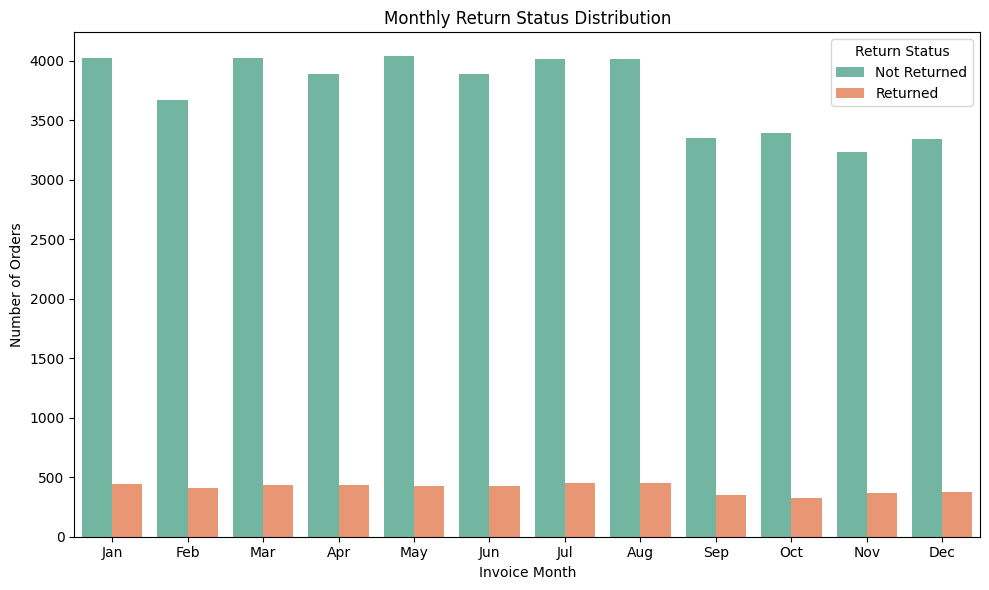

In [46]:
# COUNTPLOT
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data,
    x='InvoiceMonth',
    hue=data['ReturnStatus'].map({0: 'Not Returned', 1: 'Returned'}),
    palette='Set2'
)

plt.title("Monthly Return Status Distribution")
plt.xlabel("Invoice Month")
plt.ylabel("Number of Orders")
plt.legend(title="Return Status")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()

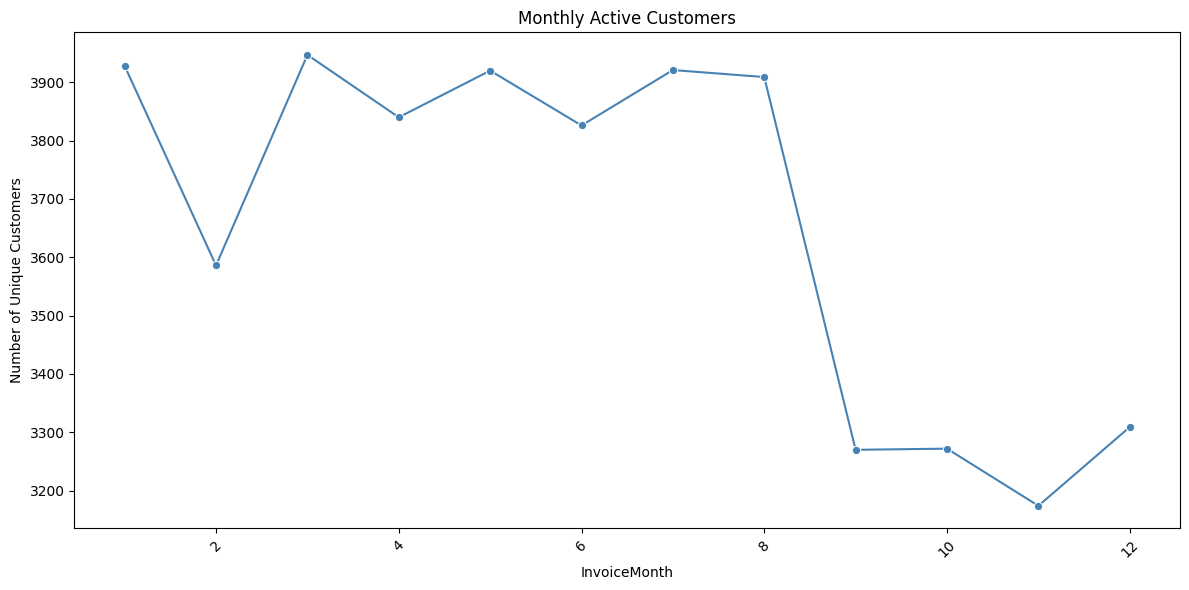

In [47]:
# Group by Month and count unique customers
monthly_customers = data.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index()

# Plotting line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_customers, x='InvoiceMonth', y='CustomerID', marker='o', color='steelblue')


plt.title('Monthly Active Customers')
plt.xlabel('InvoiceMonth')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
#Standard Scaler
columns_to_scale = ['UnitPrice', 'ShippingCost']
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [50]:

print(data[columns_to_scale].describe())

          UnitPrice  ShippingCost
count  4.978200e+04  4.978200e+04
mean  -2.830353e-16 -1.734180e-16
std    1.000010e+00  1.000010e+00
min   -1.735300e+00 -1.775420e+00
25%   -8.659023e-01 -8.461338e-01
50%   -2.448845e-03  7.384925e-04
75%    8.652883e-01  8.405061e-01
max    1.726556e+00  1.776897e+00


In [51]:
data.dtypes

,0
Description,int64
Quantity,int64
UnitPrice,float64
CustomerID,float64
Country,int64
Discount,float64
PaymentMethod,int64
ShippingCost,float64
Category,int64
SalesChannel,int64


In [52]:
data.to_csv("preprocessed_sales_data.csv", index=False)

In [53]:

from google.colab import files
files.download("preprocessed_sales_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>